In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [67]:
df=pd.read_csv('/content/HR_Employee_Attrition_Dataset.csv')

In [111]:
df.head()

,Employee_ID,Age,Department,Monthly_Salary,Years_at_Company,Job_Satisfaction,Work_Life_Balance,Performance_Rating,Attrition,Salary_Band
0,E1000,59.0,Sales,41475,15,1.0,Good,Medium,No,Medium
1,E1001,49.0,Operations,33888,6,4.0,Excellent,High,No,Low
2,E1002,35.0,Operations,58732,13,3.0,Good,Very High,No,Medium
3,E1003,28.0,IT,96623,13,3.0,Good,Low,No,Very High
4,E1004,41.0,IT,61305,3,4.0,Good,High,No,Medium


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Employee_ID         1200 non-null   object 
 1   Age                 1200 non-null   int64  
 2   Department          1132 non-null   object 
 3   Monthly_Salary      1200 non-null   int64  
 4   Years_at_Company    1200 non-null   int64  
 5   Job_Satisfaction    1153 non-null   float64
 6   Work_Life_Balance   1148 non-null   object 
 7   Performance_Rating  1200 non-null   object 
 8   Attrition           1200 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 84.5+ KB


In [70]:
df.describe()

,Age,Monthly_Salary,Years_at_Company,Job_Satisfaction
count,1200.000000,1200.000000,1200.000000,1153.000000
mean,40.603333,67003.321667,13.044167,2.451865
std,14.654349,29868.611512,10.065368,1.005013
min,5.000000,15138.000000,0.000000,1.000000
25%,30.000000,40481.500000,6.000000,2.000000
50%,41.000000,67411.500000,12.000000,3.000000
75%,51.000000,92575.750000,17.000000,3.000000
max,95.000000,119946.000000,40.000000,4.000000


In [71]:
df.isnull().sum()

,0
Employee_ID,0
Age,0
Department,68
Monthly_Salary,0
Years_at_Company,0
Job_Satisfaction,47
Work_Life_Balance,52
Performance_Rating,0
Attrition,0


In [72]:
df['Age'].unique()

array([59, 49, 35, 28, 41, 39, 43, 31, 44, 56,  5, 23, 42, 22, 50, 58, 53,
       32, 45, 47, 48, 36, 57, 27, 29, 38, 24, 34, 46, 40, 55, 37, 26, 54,
       30, 51, 95, 21, 25, 33, 52])

In [73]:
df['Age'].min()

5

In [74]:
df['Age'].max()

95

In [75]:
df['Age'].value_counts()

,count
Age,
53,42
46,42
57,38
48,36
43,36
55,35
21,34
28,33
25,33


In [76]:
q1=df['Age'].quantile(0.25)

In [77]:
q3=df['Age'].quantile(0.75)

In [78]:
iqr=q3-q1

In [79]:
iqr

np.float64(21.0)

In [80]:
lb=q1-1.5*iqr

In [81]:
lb

np.float64(-1.5)

In [82]:
ub=q3+1.5*iqr

In [83]:
ub

np.float64(82.5)

<Axes: ylabel='Age'>

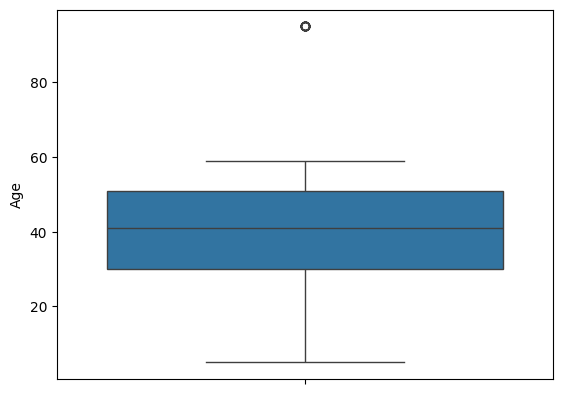

In [84]:
sns.boxplot(df['Age'])

In [85]:
df['Age']=df['Age'].mask((df['Age']<lb)|(df['Age']>ub),np.nan)

In [86]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [87]:
df['Department'].unique()

array(['Sales', 'Operations', 'IT', 'HR', 'Finance', nan], dtype=object)

In [88]:
df['Department']=df['Department'].fillna(df['Department'].mode()[0])

In [89]:
df['Department']=df['Department'].astype('category')

In [90]:
df.isnull().sum()

,0
Employee_ID,0
Age,0
Department,0
Monthly_Salary,0
Years_at_Company,0
Job_Satisfaction,47
Work_Life_Balance,52
Performance_Rating,0
Attrition,0


In [91]:
df['Monthly_Salary'].unique()

array([ 41475,  33888,  58732, ...,  54464,  57351, 108330])

<Axes: ylabel='Years_at_Company'>

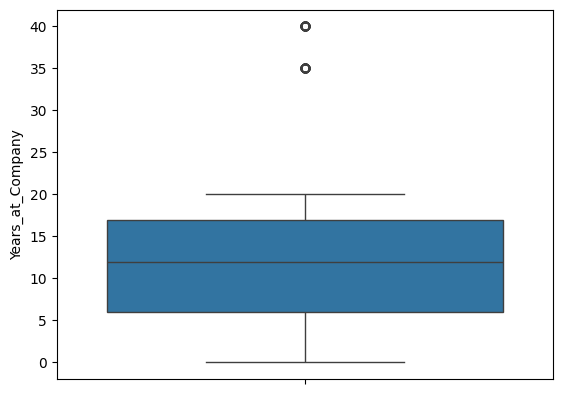

In [92]:
sns.boxplot(df['Years_at_Company'])

In [93]:
df['Years_at_Company'].unique()

array([15,  6, 13,  3, 14,  2,  4,  0,  7,  1,  9, 16, 40, 20, 19, 12,  8,
       35,  5, 18, 11, 17, 10])

In [94]:
df['Job_Satisfaction'].unique()

array([ 1.,  4.,  3.,  2., nan])

In [95]:
df['Job_Satisfaction'].value_counts()

,count
Job_Satisfaction,
3.0,411
2.0,303
1.0,256
4.0,183


In [96]:
df['Job_Satisfaction']=df['Job_Satisfaction'].fillna(df['Job_Satisfaction'].mode()[0])

In [97]:
df['Job_Satisfaction']=df['Job_Satisfaction'].astype('category')

In [98]:
df['Work_Life_Balance']=df['Work_Life_Balance'].fillna(df['Work_Life_Balance'].mode()[0])

In [99]:
df['Work_Life_Balance']=df['Work_Life_Balance'].astype('category')

In [100]:
df['Attrition'].unique()

array(['No', 'Yes'], dtype=object)

In [101]:
df['Attrition'].value_counts()

,count
Attrition,
No,959
Yes,241


In [102]:
px.pie(df,names='Attrition',title='Attrition Rate').show()

In [103]:
grp=df.groupby(df['Department'],as_index=False)['Monthly_Salary'].mean().sort_values(by=['Monthly_Salary'],ascending=False)

/tmp/ipython-input-1627315387.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [104]:
px.bar(grp,x='Department',y='Monthly_Salary',title='Department wise Average Monthly Salary').show()

In [105]:
grp=df.groupby(df['Department'],as_index=False)['Attrition'].count().sort_values(by=['Attrition'],ascending=False)

/tmp/ipython-input-3600313600.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [106]:
px.bar(grp,x='Department',y='Attrition',title='Department Wise Attrition Rate').show()

In [107]:
df.shape

(1200, 9)

In [108]:
grp=df.groupby(df['Job_Satisfaction'],as_index=False)['Attrition'].count().sort_values(by=['Attrition'],ascending=False)

/tmp/ipython-input-2200448603.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [109]:
px.bar(grp,x='Job_Satisfaction',y='Attrition',title='Employee Attrition by Job Satisfaction').show()

In [110]:
df['Salary_Band'] = pd.qcut(
    df['Monthly_Salary'],
    q=4,
    labels=['Low', 'Medium', 'High', 'Very High']
)


In [114]:
df.to_csv('/content/HR_Employee_Attrition_Dataset.csv', index=False)

print("Scraping completed! Data saved to 'HR_Employee_Attrition_Dataset.csv'")

Scraping completed! Data saved to 'HR_Employee_Attrition_Dataset.csv'
